In [19]:
import yfinance as yf
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np

In [4]:
#!pip install yfinance

In [5]:
yf.pdr_override()
start=dt.datetime(2020, 1, 1)
now=dt.datetime(2021,6,1)

In [6]:
df=pd.read_csv("stocks/TCS.csv",index_col=0, parse_dates=True)

In [128]:
#df

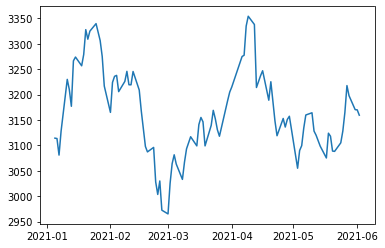

In [9]:
#df["High"].plot(label="High")
plt.plot(df["High"])

In [10]:
pivots=[]
dates=[]
counter=0
lastPivot=0
Range=[0,0,0,0,0,0,0,0,0,0]
dateRange=[0,0,0,0,0,0,0,0,0,0]

In [11]:
for i in df.index:
    currentMax=max(Range,default=0)
    value=round(df["High"][i],2)
    Range=Range[1:9]
    Range.append(value)
    dateRange=dateRange[1:9]
    dateRange.append(i)
    if currentMax==max(Range,default=0):
        counter+=1
    else:
        counter=0
    if counter==5:
        lastPivot=currentMax
        dateloc=Range.index(lastPivot)
        lastDate=dateRange[dateloc]
        pivots.append(lastPivot)
        dates.append(lastDate)
        
print(str(pivots))
print(str(dates))

[3339.8, 3245.8, 3354.35, 3164.2]
[Timestamp('2021-01-25 00:00:00'), Timestamp('2021-02-09 00:00:00'), Timestamp('2021-04-09 00:00:00'), Timestamp('2021-05-10 00:00:00')]


In [12]:
timeD=dt.timedelta(days=40)

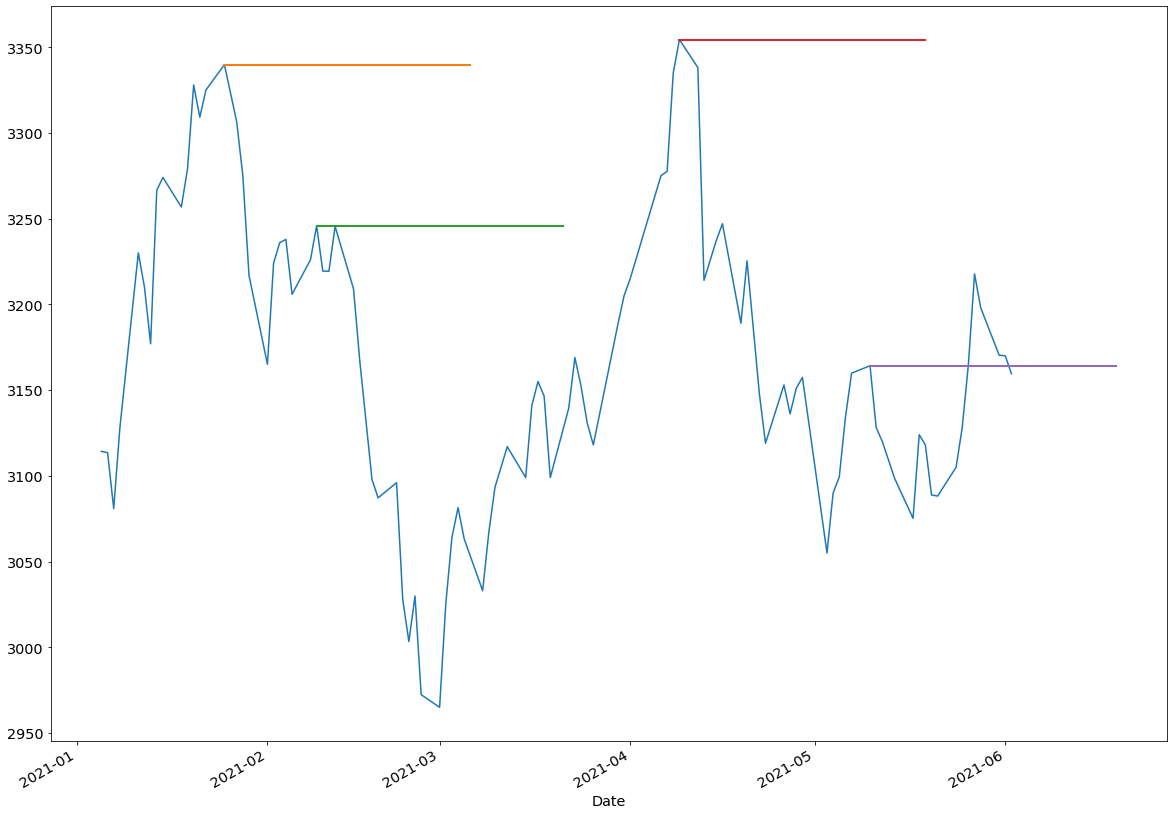

In [13]:

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
df["High"].plot(label="High")
for index in range(len(pivots)):
    #print(str(pivots[index])+"      "+str(dates[index]))
    
    plt.plot_date([dates[index],dates[index]+timeD],[pivots[index],pivots[index]], linestyle="-", linewidth=2, marker=",")
plt.show()
    

In [14]:
# for index in range(len(pivots)):
#     #print(str(pivots[index])+"      "+str(dates[index]))
#     df["High"].plot(label="High")
#     ap = mpf.make_addplot([[dates[index],dates[index]+timeD],[pivots[index],pivots[index]]],type='ohlc')
#     #ap=plt.plot_date([dates[index],dates[index]+timeD],[pivots[index],pivots[index]], linestyle="-", linewidth=2, marker=",")
#     mpf.plot(df,type='candle',volume=True,addplot=ap)
# plt.show()

In [40]:
#mpf.plot(df,type='candle',volume=True,addplot=ap2)

In [20]:
df["pivots"]=np.nan

In [71]:
#df.head(30)

In [130]:
df=df.reset_index()

In [81]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'pivots'],
      dtype='object')

In [41]:
print(str(pivots))
print(str(dates))


[3339.8, 3245.8, 3354.35, 3164.2]
[Timestamp('2021-01-25 00:00:00'), Timestamp('2021-02-09 00:00:00'), Timestamp('2021-04-09 00:00:00'), Timestamp('2021-05-10 00:00:00')]


In [98]:
date_column=df[["Date"]]

In [99]:
date_column

,Date
0,2021-01-05
1,2021-01-06
2,2021-01-07
3,2021-01-08
4,2021-01-11
...,...
95,2021-05-27
96,2021-05-28
97,2021-05-31
98,2021-06-01


In [108]:
#pivots[0]

In [46]:
df[df["Date"]==dates[0]]


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,pivots
14,2021-01-25,TCS,EQ,3303.1,3308.95,3339.8,3278.65,3298.0,3291.3,3314.24,2272887,7.532890e+14,122553,1208668,0.5318,NaN


In [112]:
value=np.nan
i=0
length=len(pivots)
for index, row in df.iterrows():
    date=row["Date"]
    #print(date)
    #print(pivots[i])
    if i<length and date==dates[i]:
        value=pivots[i]
        i=i+1
        #print(row['Date'])
        #print(value)
    df.at[index,'pivots']=value
    #print(date)
    #print(value)
        
    

In [119]:
list

[[14   2021-01-25
  Name: Date, dtype: datetime64[ns],
  14    3339.8
  Name: pivots, dtype: object],
 [24   2021-02-09
  Name: Date, dtype: datetime64[ns],
  24    3245.8
  Name: pivots, dtype: object],
 [64   2021-04-09
  Name: Date, dtype: datetime64[ns],
  64    3354.35
  Name: pivots, dtype: object],
 [83   2021-05-10
  Name: Date, dtype: datetime64[ns],
  83    3164.2
  Name: pivots, dtype: object]]

In [120]:
df.tail(50)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,pivots
50,2021-03-18,TCS,EQ,3112.95,3125.95,3146.45,2987.05,3042.00,3036.50,3083.67,3656306,1.127483e+15,164183,1670043,0.4568,3245.8
51,2021-03-19,TCS,EQ,3036.50,3030.00,3099.00,3005.00,3054.80,3050.20,3049.18,5776626,1.761399e+15,153489,3138698,0.5433,3245.8
52,2021-03-22,TCS,EQ,3050.20,3048.70,3139.45,3018.65,3128.00,3129.65,3086.03,2821646,8.707679e+14,137406,1165276,0.4130,3245.8
53,2021-03-23,TCS,EQ,3129.65,3140.00,3169.00,3122.85,3142.00,3142.60,3148.33,3305973,1.040830e+15,167131,1615396,0.4886,3245.8
54,2021-03-24,TCS,EQ,3142.60,3111.20,3152.30,3111.15,3123.60,3121.10,3130.63,2207104,6.909632e+14,110682,930779,0.4217,3245.8
55,2021-03-25,TCS,EQ,3121.10,3112.20,3130.85,3050.00,3074.50,3064.85,3091.11,3179786,9.829064e+14,153808,1567362,0.4929,3245.8
56,2021-03-26,TCS,EQ,3064.85,3090.65,3118.00,3043.05,3062.00,3066.80,3078.97,3697370,1.138408e+15,201134,1512152,0.4090,3245.8
57,2021-03-30,TCS,EQ,3066.80,3083.00,3188.45,3060.90,3172.00,3158.55,3139.65,4694261,1.473833e+15,191356,2277177,0.4851,3245.8
58,2021-03-31,TCS,EQ,3158.55,3155.00,3205.00,3132.00,3175.30,3177.85,3177.88,3530069,1.121814e+15,156653,1236712,0.3503,3245.8
59,2021-04-01,TCS,EQ,3177.85,3191.10,3215.00,3145.00,3167.00,3165.00,3178.41,4285076,1.361974e+15,154796,2256615,0.5266,3245.8


In [76]:
mc = mpf.make_marketcolors(up='g',down='r',edge='black',volume='gray',ohlc='black')
s  = mpf.make_mpf_style(marketcolors=mc)

In [136]:
df=df.set_index('Date')

In [125]:
len(date_column)

100

In [126]:
# for i in range(len(pivots)):
#     data=df[date_column==pivots[i]]
    
# data

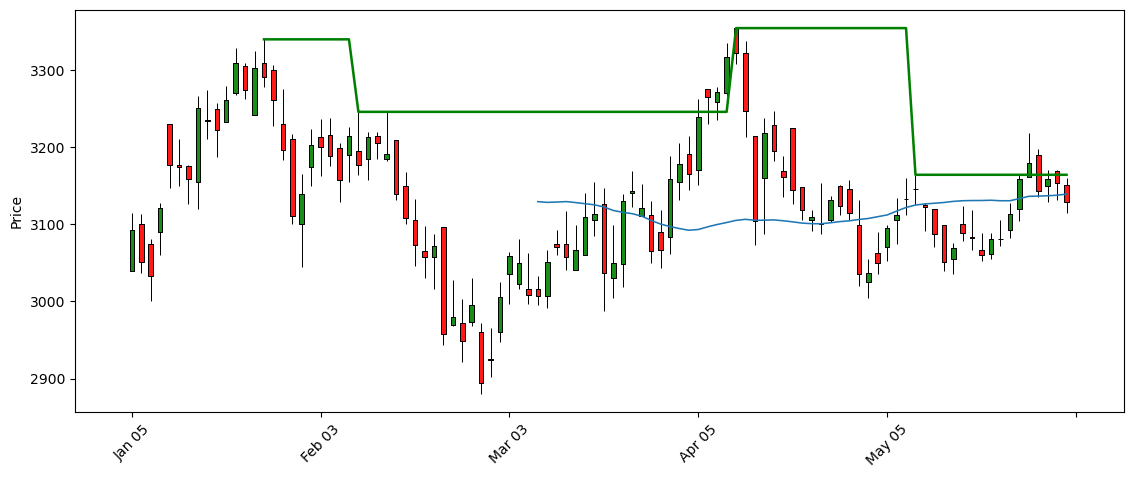

In [138]:
ap0 = [ mpf.make_addplot(df["pivots"],color='g'),  # uses panel 0 by default
      ]
mpf.plot(df,type='candle',addplot=ap0, figratio=(38,15),mav=44,style=s)
